In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets  import load_digits
from sklearn.metrics import confusion_matrix

# Binary Classification

In [4]:
df = pd.read_csv('Dataset/data/HR_comma_sep.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


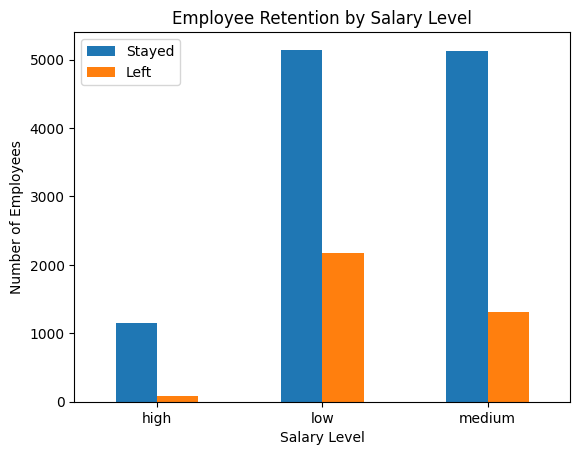

In [11]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Left'])
plt.show()

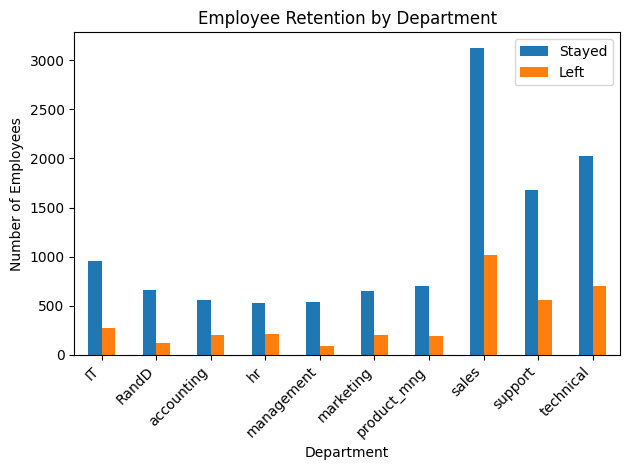

In [12]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(['Stayed', 'Left'])
plt.tight_layout()
plt.show()

In [ ]:
salary_dummies = pd.get_dummies(df['salary'], prefix='salary', drop_first=True, dtype=int)
df_processed = pd.concat([df.drop('salary', axis=1), salary_dummies], axis=1)
selected_features = [
    'satisfaction_level', 
    'average_montly_hours', 
    'promotion_last_5years'
]
if 'salary_medium' in df_processed.columns: 
    selected_features.append('salary_medium')
if 'salary_high' in df_processed.columns:
    selected_features.append('salary_high')
X = df_processed[selected_features]
y = df_processed['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.7637


# Multiclass Classification

In [16]:
digits = load_digits()

In [17]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

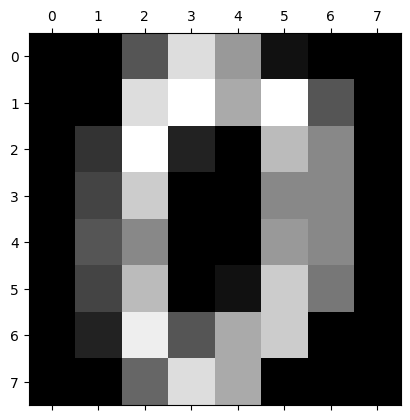

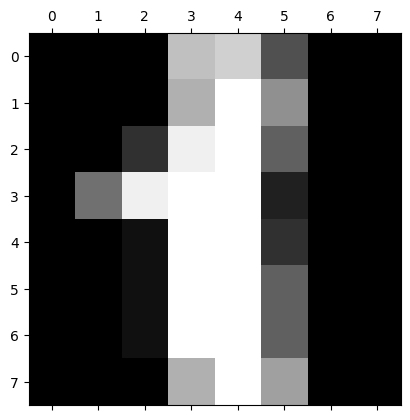

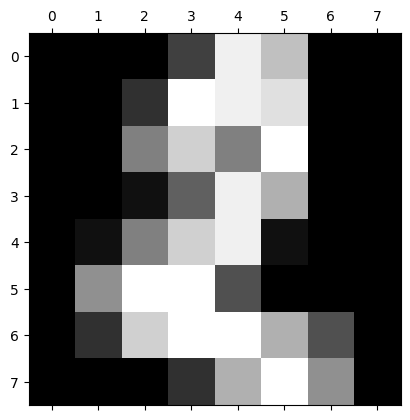

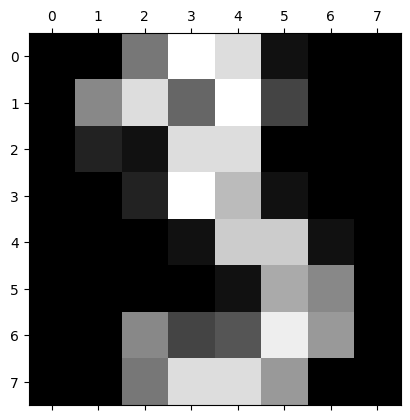

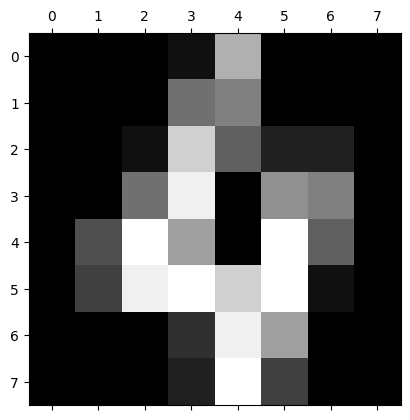

In [18]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    plt.show()

In [19]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [23]:
a_train, a_test, b_train, b_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [26]:
model1 = LogisticRegression(max_iter=10000)
model1.fit(a_train, b_train)
accuracy1 = model1.score(a_test, b_test)
accuracy1

0.9694444444444444

In [30]:
b_predicted = model1.predict(a_test)
cm = confusion_matrix(b_test, b_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 1,  3,  1,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'actual')

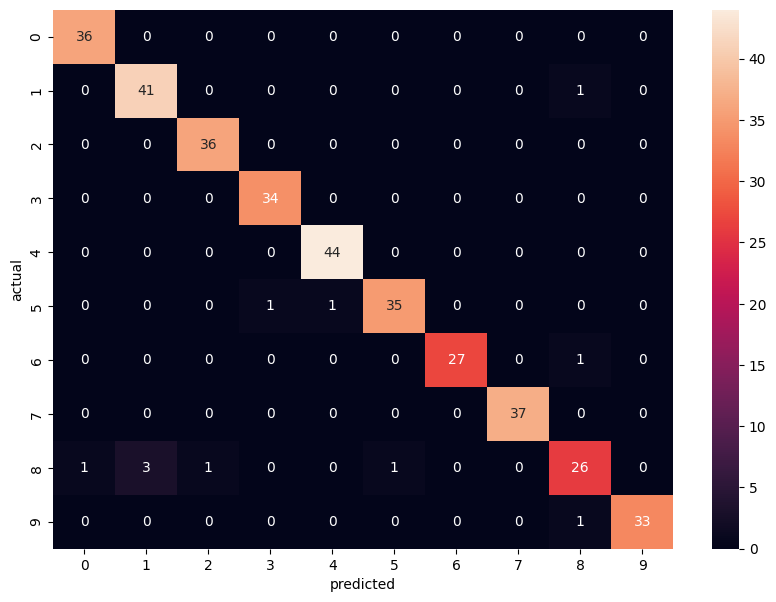

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')